In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.anisotropic import Experiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time

In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = Experiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


1.175

In [4]:
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:35439
INFO:DRV:      Host server up..............Done 0.05s
INFO:DRV:      Compiling Embedded snips....Done 0.15s
INFO:DRV:      Encoding axons/synapses.....Done 14.95s
INFO:DRV:      Encoding probes.............Done 4.27ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1574079560.4590845/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/../bin/x86/kb/init_bs.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.82s
INFO:DRV:      Transferring probes.........Done 0.04s
INFO:DRV:      Transferring spikes.........Done 5.15ms
INFO:DRV:      Configuring registers.......Done 15.37s
INFO:HST:  chip=1 cpu=0 halted, status=0x0

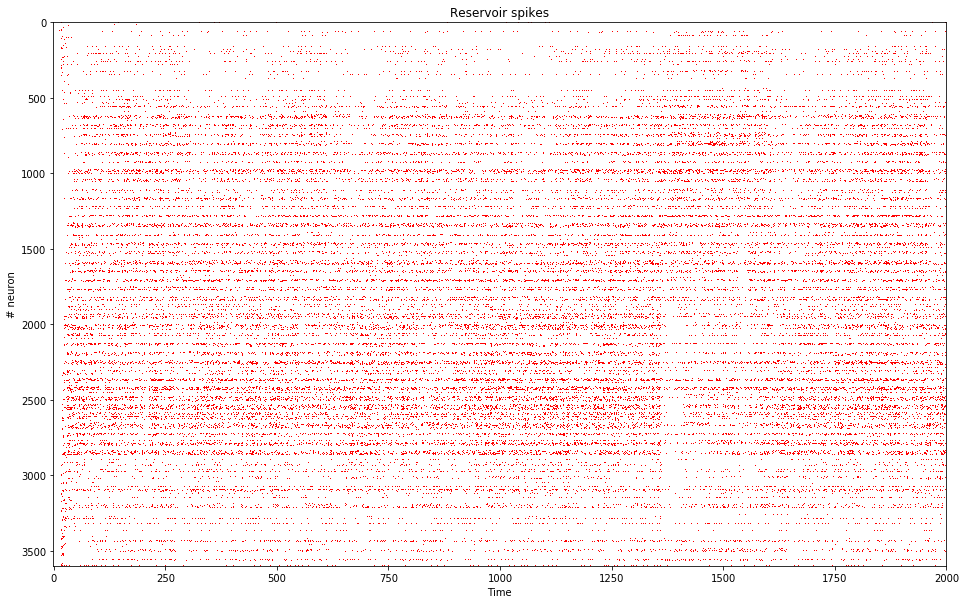

In [5]:
exp.net.plot.reservoirSpikeTrain()

In [6]:
#np.save('exSpikeTrain.npy', inExp.net.exSpikeTrains)

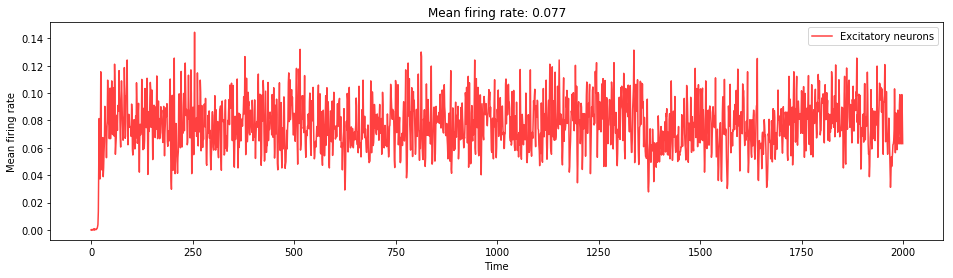

In [7]:
exp.net.plot.reservoirRates()

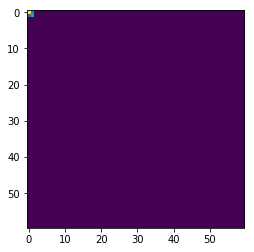

In [8]:
wgtmean = np.mean(exp.net.cueWeights, axis=1)
wgt = wgtmean.reshape((60,60))
p = plt.imshow(wgt)

In [9]:
# landscape
#  4  3  2
#  5  x  1
#  6  7  8

# dx/dy
#  (-1,1)  (0,1)  (1,1)
#  (-1,0)    x    (1,0)
#  (-1,-1) (0,-1) (1,-1)

dx = np.array([1, 1, 0, -1, -1, -1, 0, 1])
dy = np.array([0, 1, 1, 1, 0, -1, -1, -1])

In [10]:
ldx = dx[exp.net.landscape % len(dx)]
ldy = dy[exp.net.landscape % len(dy)]

In [11]:
topsize = int(np.sqrt(exp.p.reservoirExSize))
x = np.arange(0, topsize, 1)
y = np.arange(0, topsize, 1)
xx, yy = np.meshgrid(x,y)

In [12]:
inputMask = wgtmean
inputMask[inputMask > 0] = 1
inputMask = inputMask.astype(int).reshape((topsize,topsize))

In [13]:
from matplotlib import colors

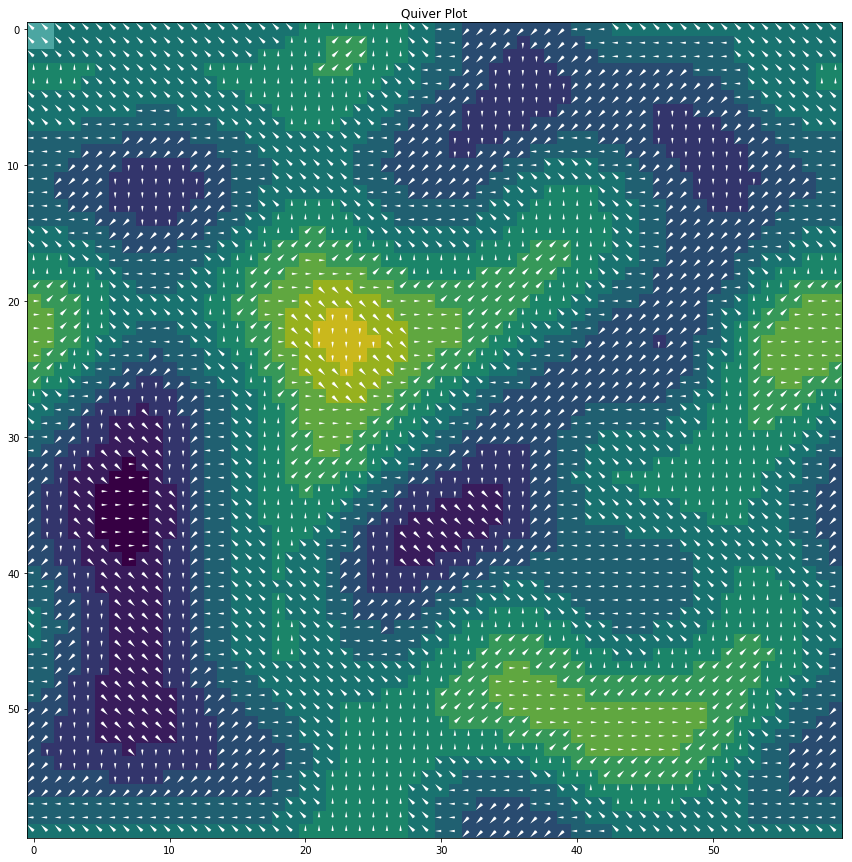

In [14]:
fig, ax = plt.subplots(figsize=(15,15))

# Show landscape, every direction gets a color
ax.imshow(exp.net.landscape.reshape(topsize, topsize))
# HIghlights the input area
ax.imshow(inputMask, alpha=0.2, cmap = colors.ListedColormap(['black', 'white']))
# Show vectors
ax.quiver(xx, yy, ldx, -ldy, headwidth=2, color="white")  # note: -dy flips quiver to match imshow

ax.set(aspect=1, title='Quiver Plot')
plt.show()

In [15]:
#print(inExp.p)

In [16]:
%matplotlib inline
#inExp.net.plot.reservoirSpikeTrain(fr=2000, to=3000)

In [17]:
# spikes of ex neurons
sp = exp.net.exSpikeTrains

In [18]:
# topological spikes
st = sp.reshape(-1, 60,60)[200:,:,:]
shp = st.shape
shp

(1800, 60, 60)

In [19]:
binSize = 10
numBins = int(shp[0]/binSize)

spBinned = np.array([ st[i*binSize:(i+1)*binSize,:,:] for i in range(numBins) ])
act = np.mean(spBinned, axis=1)
act.shape

(180, 60, 60)

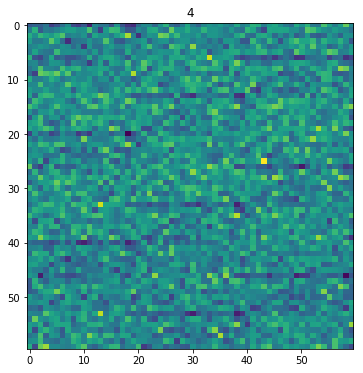

In [20]:
%matplotlib inline
plt.figure(figsize=(6, 6))
st_mean = np.mean(st, axis=0)
plt.title(str(exp.p.anisoPerlinScale))
#st_mean[st_mean < 0.06] = 0
plt.imshow(st_mean)

In [21]:
np.max(st_mean)

0.12333333333333334

In [22]:
#fig = plt.figure(figsize=(4,4))
#p = plt.imshow(act[0,:,:], interpolation='none', aspect='auto', cmap='Greys', vmin=0, vmax=0.5)

In [23]:
#%matplotlib notebook
#import matplotlib.animation as animation

#fig = plt.figure(figsize=(4,4))

#frames = []
#for i in range(act.shape[0]):
#    frames.append([plt.imshow(act[i,:,:], cmap="Greys", animated=True)])

#ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)
#ani.save('movie.mp4')
#plt.show()

%matplotlib notebook
import matplotlib.animation as animation

fps = 20

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = st[0,:,:]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(st[i,:,:])
    return [im]

#anim = animation.FuncAnimation(fig, animate_func, frames = shp[0], interval = 1000 / fps) # in ms)

#anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
                               

In [24]:
#plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [25]:
#anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])